In [76]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load the data
rawDF = pd.read_csv("Titanic Dataset.csv")
rawDF.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,0,"Ovies y Rodriguez, Mr. Servando",male,28.5,0,0,PC 17562,27.7208,D43,C,NaN,189.0,"Havana, Cuba"
1,2,1,"Watt, Miss. Bertha J",female,12.0,0,0,C.A. 33595,15.7500,NaN,S,9,NaN,"Aberdeen / Portland, OR"
2,2,1,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S,9,NaN,"Aberdeen / Portland, OR"
3,1,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.0,0,0,2543,28.5375,C53,C,7,NaN,"Albany, NY"
4,3,0,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,NaN,NaN,"Altdorf, Switzerland"


In [3]:
# Describe the data
rawDF.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
# Number of Na values in each column
rawDF.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
# Imputing the missing age column with ages I found on Titanticfacts.net
nameAgeDict = {"Baumann, Mr. John D": 60,
               "Bradley, Mr. George (George Arthur Brayton)":38,
               "Brewe, Dr. Arthur Jackson":45,
               "Cairns, Mr. Alexander":28,
               "Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)": 36,
               "Chibnall, Mrs. (Edith Martha Bowerman)":48,
               "Chisholm, Mr. Roderick Robert Crispin":43,
               "Clifford, Mr. George Quincy":40,
               "Crafton, Mr. John Bertram":59,
               "Farthing, Mr. John":57,
               "Flegenheim, Mrs. Alfred (Antoinette)":48,
               "Fleming, Miss. Margaret":42,
               "Franklin, Mr. Thomas Parham":37,
               "Frauenthal, Mrs. Henry William (Clara Heinsheimer)":49,
               "Fry, Mr. Richard":39,
               "Goldenberg, Mrs. Samuel L (Edwiga Grabowska)":40,
               "Harrington, Mr. Charles H":37,
               "Hawksford, Mr. Walter James":45,
               "Hilliard, Mr. Herbert Henry":44,
               "Hoyt, Mr. William Fisher":42,
               "Kenyon, Mrs. Frederick R (Marion)":40,
               "Klaber, Mr. Herman":41,
               "Lewy, Mr. Ervin G":30,
               "Marechal, Mr. Pierre":29,
               "Meyer, Mrs. Edgar Joseph (Leila Saks)":25,
               "Omont, Mr. Alfred Fernand":29,
               "Parr, Mr. William Henry Marsh":29,
               "Rheims, Mr. George Alexander Lucien":33,
               "Robbins, Mr. Victor":42,
               "Rood, Mr. Hugh Roscoe":39,
               "Saalfeld, Mr. Adolphe":47,
               "Salomon, Mr. Abraham L":43,
               "Smith, Mr. Richard William":57,
               "Spencer, Mrs. William Augustus (Marie Eugenie)":57,
               "Stewart, Mr. Albert A":64,
               "Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)":49,
               "Thorne, Mrs. Gertrude Maybelle":38,
               "Williams-Lambert, Mr. Fletcher Fellows":43,
               "Woolner, Mr. Hugh":45,
               "Campbell, Mr. William":21,
               "Corey, Mrs. Percy C (Mary Phyllis Elizabeth Miller)":30,
               "Cunningham, Mr. Alfred Fleming":21,
               "Frost, Mr. Anthony Wood (Archie)":38,
               "Keane, Miss. Nora A":46,
               "Knight, Mr. Robert J":39,
               "Lamb, Mr. John Joseph":30,
               "Leitch, Miss. Jessie Wills":31,
               "Malachard, Mr. Noel":25,
               "Mangiavacchi, Mr. Serafino Emilio":30,
               "Padro y Manent, Mr. Julian":26,
               "Parkes, Mr. Francis (Frank)":21,
               "Pernot, Mr. Rene":39,
               "Watson, Mr. Ennis Hastings":19,
               "Wheeler, Mr. Edwin (Frederick)":24,
               "Williams, Mr. Charles Eugene":23,
               "Betros, Master. Seman":10,
               "Boulos, Mr. Hanna":18,
               "Boulos, Mrs. Joseph (Sultana)":40,
               "Bourke, Miss. Mary":40,
               "Caram, Mr. Joseph":28,
               "Caram, Mrs. Joseph (Maria Elias)":18,
               "Davison, Mr. Thomas Henry":32,
               "Davison, Mrs. Thomas Henry (Mary E Finck)":34,
               "Demetri, Mr. Marinko":23,
               "Denkoff, Mr. Mitto":30,
               "Doharr, Mr. Tannous":28,
               "Elias, Mr. Dibo":29,
               "Emir, Mr. Farred Chehab":29,
               "Finoli, Mr. Luigi":34,
               "Fleming, Miss. Honora":22,
               "Flynn, Mr. James":28,
               "Flynn, Mr. John":42,
               "Foley, Mr. William":20,
               "Foo, Mr. Choong":32,
               "Ford, Mr. Arthur":22,
               "Fox, Mr. Patrick":28,
               "Franklin, Mr. Charles (Charles Fardon)":45,
               "Garfirth, Mr. John":21,
               #"Gheorgheff, Mr. Stanio"
               "Glynn, Miss. Mary Agatha":19,
               "Guest, Mr. Robert":23,
               "Hagland, Mr. Ingvald Olai Olsen":28,
               "Hagland, Mr. Konrad Mathias Reiersen":19,
               "Harknett, Miss. Alice Phoebe":21,
               "Hart, Mr. Henry":28,
               "Healy, Miss. Hanora (Nora)":29,
               "Hee, Mr. Ling":24,
               "Henry, Miss. Delia":21,
               "Horgan, Mr. John":22,
               "Howard, Miss. May Elizabeth":26,
               "Hyman, Mr. Abraham":34,
               "Ilieff, Mr. Ylio":32,
               "Ivanoff, Mr. Kanio":20,
               "Jardin, Mr. Jose Neto":21,
               "Jermyn, Miss. Annie":26,
               "Johannesen-Bratthammer, Mr. Bernt":29,
               "Johnston, Master. William Arthur (Willie)":8,
               "Johnston, Miss. Catherine Helen (Carrie)":7,
               "Johnston, Mr. Andrew G":35,
               "Johnston, Mrs. Andrew G (Elizabeth Lily Watson)":36,
               "Kassem, Mr. Fared":18,
               "Keane, Mr. Andrew (Andy)":23,
               "Keefe, Mr. Arthur":39,
               "Kelly, Miss. Anna Katherine (Annie Kate)":20,
               "Kelly, Miss. Mary":22,
               "Kennedy, Mr. John":24,
               "Khalil, Mr. Betros":25,
               "Khalil, Mrs. Betros (Zahie Maria Elias)":20,
               "Kiernan, Mr. John":25,
               "Kiernan, Mr. Philip":22,
               "Kilgannon, Mr. Thomas J":22,
               #"Kraeff, Mr. Theodor":
               "Lahoud, Mr. Sarkis":30,
               "Laleff, Mr. Kristo":23,
               "Lam, Mr. Ali":38,
               "Lam, Mr. Len":23,
               "Lane, Mr. Patrick":16,
               "Lefebre, Master. Henry Forbes":5,
               "Lefebre, Miss. Ida":3,
               "Lefebre, Miss. Jeannie":8,
               "Lefebre, Miss. Mathilde":12,
               "Lefebre, Mrs. Frank (Frances)":40,
               "Lennon, Miss. Mary":19,
               "Lennon, Mr. Denis":20,
               "Linehan, Mr. Michael":21,
               "Lithman, Mr. Simon":26,
               "Lockyer, Mr. Edward":19,
               "Lyntakoff, Mr. Stanko":44,
               "MacKay, Mr. George William":20,
               "Madigan, Miss. Margaret (Maggie)":21,
               "Mahon, Miss. Bridget Delia":20,
               #"Mahon, Mr. John":
               "Maisner, Mr. Simon":34,
               "Mamee, Mr. Hanna":18,
               "Mannion, Miss. Margareth":28,
               "Mardirosian, Mr. Sarkis":25,
               "Masselmani, Mrs. Fatima":22,
               "Matinoff, Mr. Nicola":30,
               "McCarthy, Miss. Catherine (Katie)":24,
               "McCormack, Mr. Thomas Joseph":19,
               "McCoy, Miss. Agnes":29,
               "McCoy, Miss. Alicia":26,
               "McCoy, Mr. Bernard":24,
               "McDermott, Miss. Brigdet Delia":31,
               "McEvoy, Mr. Michael":19,
               "McGovern, Miss. Mary":22,
               "McMahon, Mr. Martin":19,
               "McNeill, Miss. Bridget":32,
               "Meanwell, Miss. (Marion Ogden)":62,
               "Meek, Mrs. Thomas (Annie Louise Rowley)":31,
               "Mernagh, Mr. Robert":28,
               "Miles, Mr. Frank":23,
               "Mitkoff, Mr. Mito":23,
               "Mockler, Miss. Helen Mary (Ellie)":23,
               "Moore, Mr. Leonard Charles":19,
               "Moran, Miss. Bertha":28,
               "Moran, Mr. Daniel J":27,
               "Moran, Mr. James":23,
               "Morrow, Mr. Thomas Rowan":30,
               "Moss, Mr. Albert Johan":29,
               "Moubarek, Master. Gerios":7,
               "Moubarek, Master. Halim Gonios (William George)":4,
               "Moubarek, Mrs. George (Omine Amenia Alexander)":24,
               "Moussa, Mrs. (Mantoura Boulos)":35,
               "Moutal, Mr. Rahamin Haim":28,
               "Mullens, Miss. Katherine (Katie)":21,
               "Murdlin, Mr. Joseph":22,
               "Murphy, Miss. Katherine (Kate)":18,
               "Murphy, Miss. Margaret Jane":25,
               "Murphy, Miss. Nora":34,
               "Nankoff, Mr. Minko":32,
               "Nasr, Mr. Mustafa":20,
               "Naughton, Miss. Hannah":21,
               "Nenkoff, Mr. Christo":22,
               "O'Brien, Mr. Thomas":27,
               "O'Brien, Mr. Timothy":21,
               "O'Brien, Mrs. Thomas (Johanna Hannah Godfrey)":26,
               "O'Connell, Mr. Patrick D":17,
               "O'Connor, Mr. Maurice":16,
               "O'Connor, Mr. Patrick":23,
               "O'Donoghue, Ms. Bridget":21,
               "O'Driscoll, Miss. Bridget":27,
               "O'Dwyer, Miss. Ellen (Nellie)":25,
               "O'Keefe, Mr. Patrick":21,
               "O'Leary, Miss. Hanora (Norah)":16,
               "Olsen, Mr. Ole Martin":27,
               "O'Sullivan, Miss. Bridget Mary":21,
               "Paulner, Mr. Uscher":16,
               "Pearce, Mr. Ernest":32,
               "Pedersen, Mr. Olaf":28,
               "Peduzzi, Mr. Joseph":24,
               "Peter, Master. Michael J":4,
               "Peter, Miss. Anna":2,
               "Peter, Mrs. Catherine (Catherine Rizk)":26,
               "Peters, Miss. Katie":26,
               "Petroff, Mr. Pastcho (Pentcho)":29,
               "Plotcharsky, Mr. Vasil":27,
               "Radeff, Mr. Alexander":27,
               "Rasmussen, Mrs. (Lena Jacobsen Solvang)":63,
               "Razi, Mr. Raihed":30,
               "Reed, Mr. James George":19,
               "Riordan, Miss. Johanna (Hannah)":18,
               "Risien, Mr. Samuel Beard":69,
               "Risien, Mrs. Samuel (Emma)":58,
               "Rogers, Mr. William John":29,
               "Rommetvedt, Mr. Knud Paust":49,
               "Roth, Miss. Sarah A":31,
               "Ryan, Mr. Edward":24,
               "Ryan, Mr. Patrick":30,
               "Saad, Mr. Amin":30,
               "Saade, Mr. Jean Nassr":20,
               "Sadlier, Mr. Matthew":18,
               "Sadowitz, Mr. Harry":17,
               "Sage, Master. Thomas Henry":4,
               "Sage, Miss. Ada":10,
               "Sage, Miss. Constance Gladys":7,
               "Sage, Miss. Dorothy Edith (Dolly)":14,
               "Sage, Miss. Stella Anna":20,
               "Sage, Mr. Douglas Bullen":18,
               "Sage, Mr. Frederick":16,
               "Sage, Mr. George John Jr":19,
               "Sage, Mr. John George":44,
               "Sage, Mrs. John (Annie Bullen)":44,
               "Samaan, Mr. Elias":17,
               "Samaan, Mr. Hanna":40,
               "Samaan, Mr. Youssef":16,
               "Scanlan, Mr. James":22,
               "Sdycoff, Mr. Todor":42,
               "Shaughnessy, Mr. Patrick":24,
               "Shellard, Mr. Frederick William":55,
               "Shine, Miss. Ellen Natalia":20,
               "Shorney, Mr. Charles Joseph":22,
               "Simmons, Mr. John":40,
               "Sirota, Mr. Maurice":20,
               "Slabenoff, Mr. Petco":42,
               "Slocovski, Mr. Selman Francis":20,
               "Smiljanic, Mr. Mile":37,
               "Smith, Mr. Thomas":26,
               "Smyth, Miss. Julia":17,
               "Spector, Mr. Woolf":23,
               "Staneff, Mr. Ivan":23,
               "Thomas, Mr. Charles P":31,
               "Thomas, Mr. John":34,
               "Thomas, Mr. Tannous":16,
               "Thomson, Mr. Alexander Morrison":36,
               "Thorneycroft, Mr. Percival":36,
               "Thorneycroft, Mrs. Percival (Florence Kate White)":32,
               "Tobin, Mr. Roger":20,
               "Todoroff, Mr. Lalio":23,
               "Torfa, Mr. Assad":20,
               "Toufik, Mr. Nakli":17,
               "van Billiard, Master. James William":10,
               "van Melkebeke, Mr. Philemon":23,
               "Ware, Mr. Frederick":34,
               "Warren, Mr. Charles William":30,
               "Webber, Mr. James":66,
               "Willer, Mr. Aaron (Abi Weller)":37,
               "Willey, Mr. Edward":18,
               "Williams, Mr. Howard Hugh (Harry)":28,
               "Wiseman, Mr. Phillippe":54,
               "Yousif, Mr. Wazli":23,
               "Yousseff, Mr. Gerious":26,
               "Zabour, Miss. Thamine":19}

In [6]:
for name, age in nameAgeDict.items():
    rawDF.loc[rawDF["name"] == name, "age"] = age

In [7]:
rawDF.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             3
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
# Names of the 3 ages I could not find
rawDF[rawDF["age"].isna()]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
810,3,0,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C,NaN,NaN,NaN
814,3,0,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,NaN,NaN,NaN
883,3,0,"Mahon, Mr. John",male,NaN,0,0,AQ/4 3130,7.7500,NaN,Q,NaN,NaN,NaN


In [9]:
# Dropping the 3 names I could not find
rows_to_drop = [810, 814, 883]
cleanedRawDF= rawDF.drop(rows_to_drop)
cleanedRawDF.isna().sum()


pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1011
embarked        2
boat          820
body         1185
home.dest     561
dtype: int64

In [10]:
# Number of passengers after removing the 3 ages I could not find
len(cleanedRawDF['name'])

1306

In [11]:
# Imputing missing fare column with the prices I found on usarover.com
nameFareDict = {"Storey, Mr. Thomas":35}
for name, fare in nameFareDict.items():
    cleanedRawDF.loc[cleanedRawDF["name"] == name, "fare"] = fare
cleanedRawDF.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1011
embarked        2
boat          820
body         1185
home.dest     561
dtype: int64

In [12]:
#Imputing missing embarked column with what port they embarked from
nameEmbarkedDict = {"Icard, Miss. Amelie": "S",
                    "Stone, Mrs. George Nelson (Martha Evelyn)":"S"}
for name, embarked in nameEmbarkedDict.items():
    cleanedRawDF.loc[cleanedRawDF["name"] == name, "embarked"] = embarked
cleanedRawDF.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1011
embarked        0
boat          820
body         1185
home.dest     561
dtype: int64

In [13]:
# Creating a title column to keep track of every passenger's title
titles = ["Mr.", "Miss.", "Master.", "Mrs.", "Dr.", "Lt.", "Col.", "Capt.", "Mlle.", "Rev.","Countess.", "Lady.", "Sir.", "Don.", "Mme.", "Ms.", "Major.", "Dona.", "Jonkheer."]
def extractTitle(name):
    for title in titles:
        if title in name:
            return title
    return None
cleanedRawDF["title"] = cleanedRawDF["name"].apply(extractTitle)
len(cleanedRawDF["title"])
# I used ChatGPT to help write the code to extract the titles in the name column ad creat a title column



1306

In [14]:
cleanedRawDF.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,0,"Ovies y Rodriguez, Mr. Servando",male,28.5,0,0,PC 17562,27.7208,D43,C,NaN,189.0,"Havana, Cuba",Mr.
1,2,1,"Watt, Miss. Bertha J",female,12.0,0,0,C.A. 33595,15.7500,NaN,S,9,NaN,"Aberdeen / Portland, OR",Miss.
2,2,1,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S,9,NaN,"Aberdeen / Portland, OR",Mrs.
3,1,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.0,0,0,2543,28.5375,C53,C,7,NaN,"Albany, NY",Mr.
4,3,0,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,NaN,NaN,"Altdorf, Switzerland",Mrs.


In [15]:
# Dropping the name, ticket number, cabin number, boat identifier, body identifier, and home/destination of passenger
DroppedDF= cleanedRawDF.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'])
DroppedDF.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
0,1,0,male,28.5,0,0,27.7208,C,Mr.
1,2,1,female,12.0,0,0,15.7500,S,Miss.
2,2,1,female,40.0,0,0,15.7500,S,Mrs.
3,1,1,male,31.0,0,0,28.5375,C,Mr.
4,3,0,female,18.0,1,0,17.8000,S,Mrs.


In [16]:
# lists of column names
categoricalColumns = ["title", "pclass", "survived", "sex", "embarked"]
numericalColumns = ["age", "sibsp", "parch", "fare"]

In [17]:
# Making bar charts for all categorical columns
def makeBarCount(myDF, colName, width, height):
    plt.figure()
    myDF[colName].value_counts().plot(kind='bar', figsize=(width, height))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"Count of Entries In {colName} Column", y=1.02)

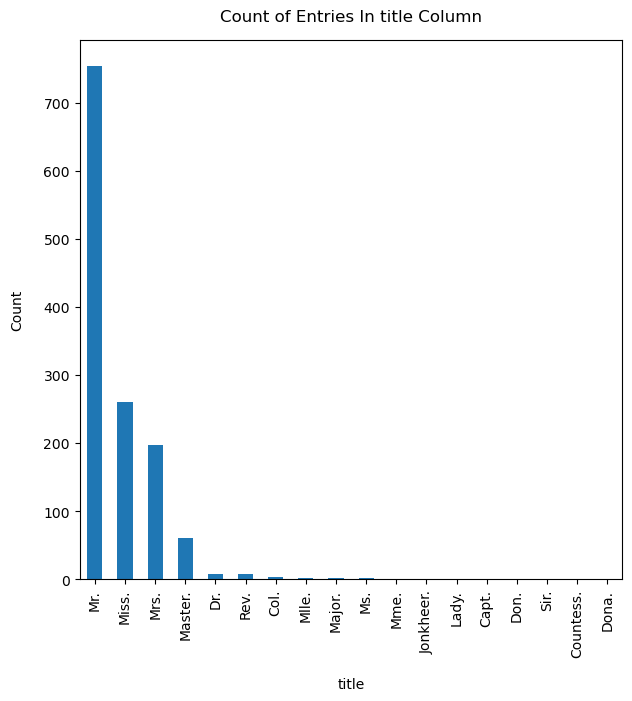

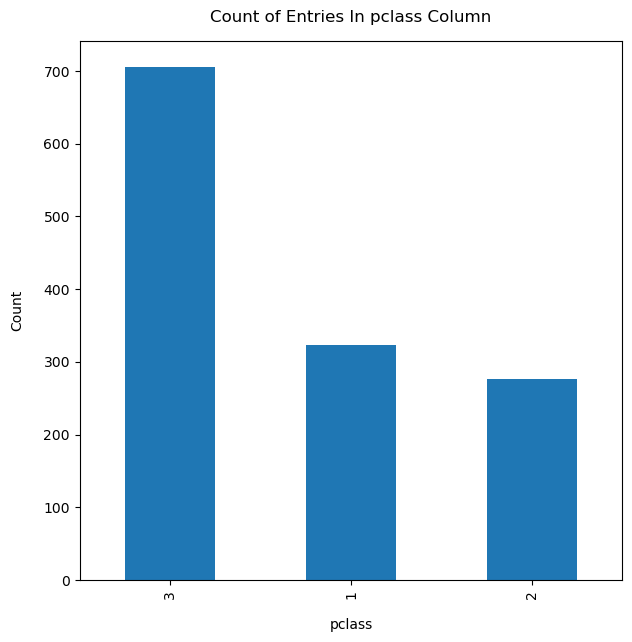

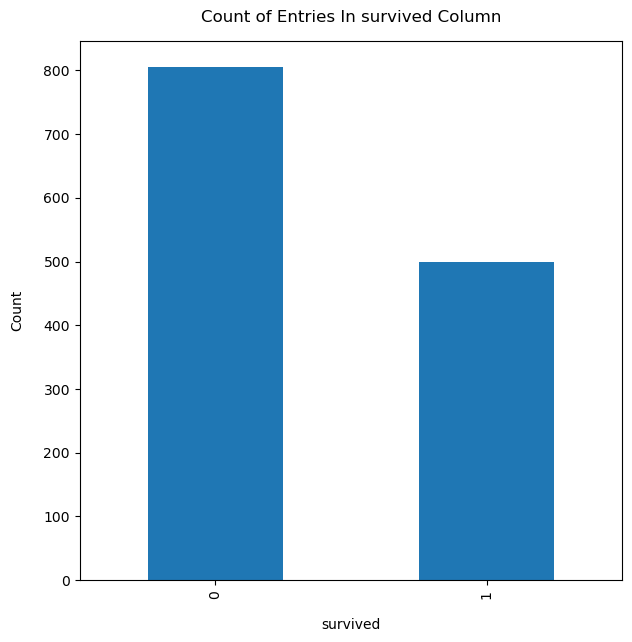

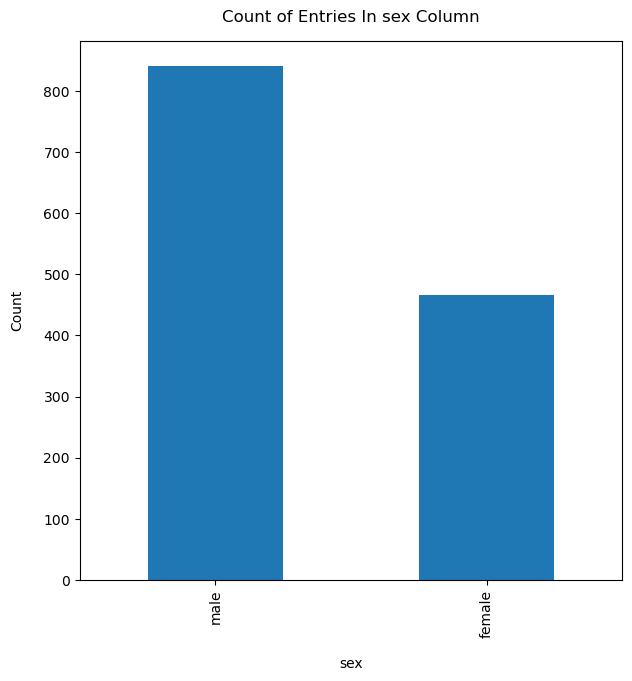

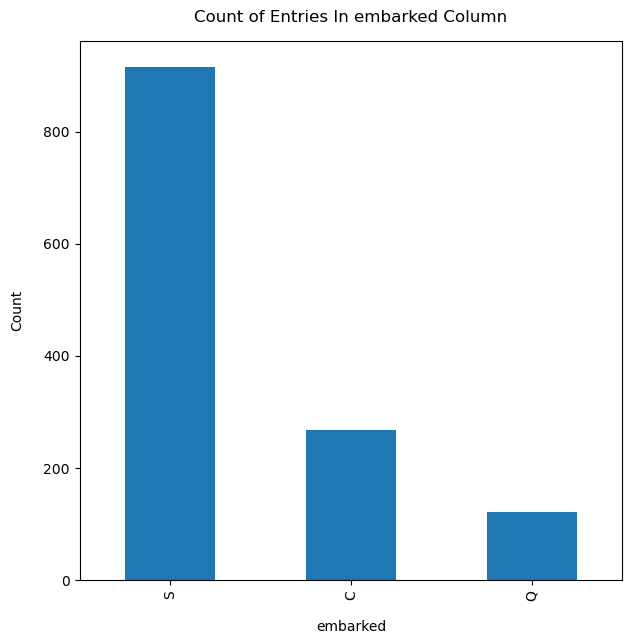

In [18]:
for col in categoricalColumns:
    makeBarCount(DroppedDF, col, 7,7)

In [19]:
# Making histograms for all numerical columns
def makeHistogram(myDF, colName, width, height):
    plt.figure(figsize=(width, height))
    plt.hist(myDF[colName])
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"Distribution of {colName} Column", y=1.02)

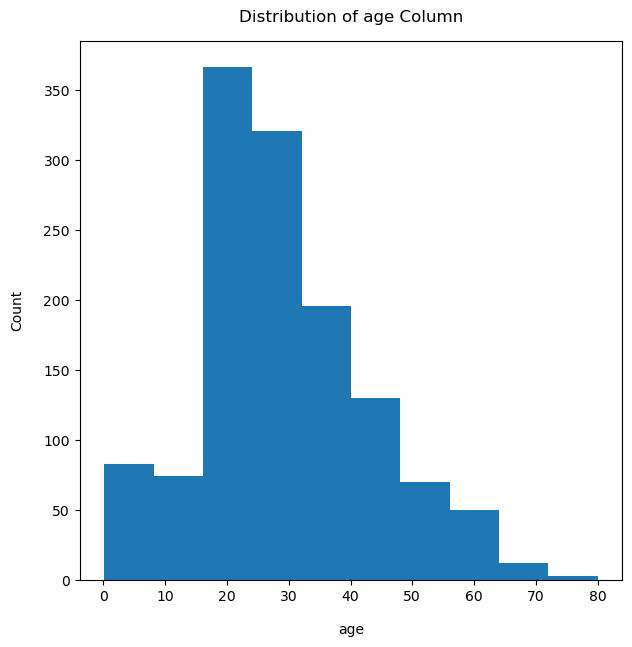

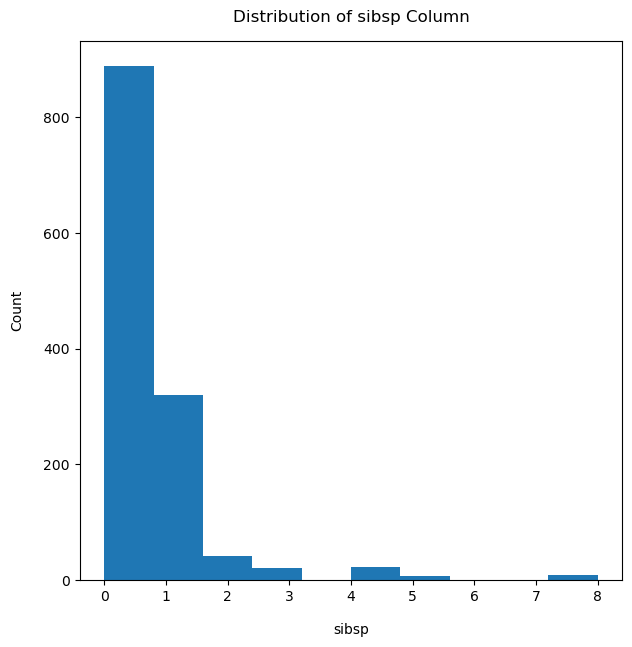

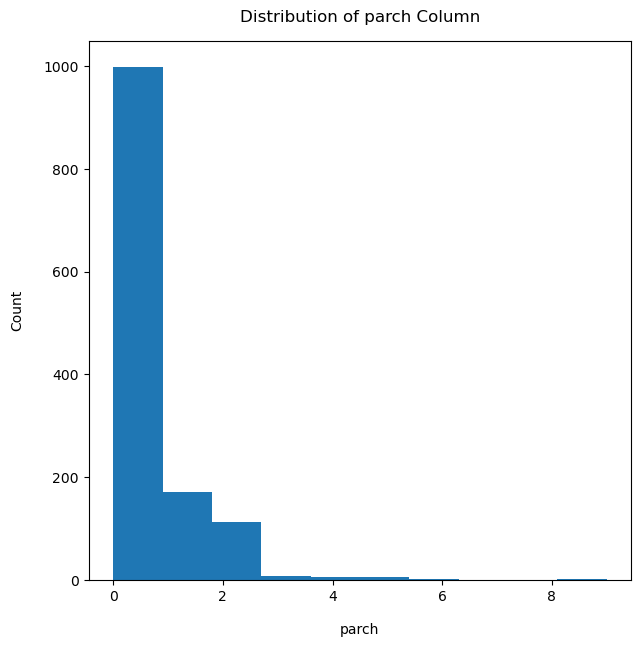

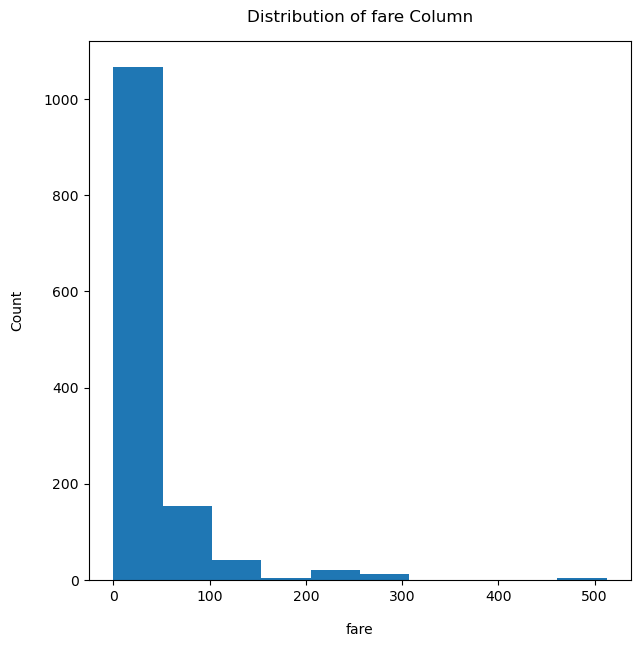

In [20]:
for col in numericalColumns:
    makeHistogram(DroppedDF, col, 7, 7)

In [21]:
# Label encoding sex of each passenger
def getLabelList(n):
    labelList = []
    for i in range(n):
        labelList.append(i)
    return labelList
sexList = ["male", "female"]
encodedDF = DroppedDF
encodedDF["sex"] = DroppedDF["sex"].replace(sexList, getLabelList(len(sexList)))
encodedDF.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
0,1,0,0,28.5,0,0,27.7208,C,Mr.
1,2,1,1,12.0,0,0,15.7500,S,Miss.
2,2,1,1,40.0,0,0,15.7500,S,Mrs.
3,1,1,0,31.0,0,0,28.5375,C,Mr.
4,3,0,1,18.0,1,0,17.8000,S,Mrs.
5,3,0,0,25.0,1,0,17.8000,S,Mr.
6,1,0,0,46.0,1,0,61.1750,S,Mr.
7,1,1,1,47.0,1,0,61.1750,S,Mrs.
8,3,0,0,22.0,0,0,9.0000,S,Mr.
9,3,0,0,25.0,0,0,7.0500,S,Mr.


In [66]:
encodedDF.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
title       0
dtype: int64

In [39]:
# One Hot Encoding embarked Column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encodedData = encoder.fit_transform(encodedDF[["embarked"]])
encoder.categories_

c:\Users\austi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['C', 'Q', 'S'], dtype=object)]

In [40]:
oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)
oneHotDF.head()

,C,Q,S
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [64]:
oneHotDF.columns = oneHotDF.columns.get_level_values(0)
cleanedDF = pd.concat([encodedDF.reset_index(drop=True), oneHotDF.reset_index(drop=True)], axis=1).drop(columns="embarked")
cleanedDF.head()

,pclass,survived,sex,age,sibsp,parch,fare,title,C,Q,S
0,1,0,0,28.5,0,0,27.7208,Mr.,1.0,0.0,0.0
1,2,1,1,12.0,0,0,15.7500,Miss.,0.0,0.0,1.0
2,2,1,1,40.0,0,0,15.7500,Mrs.,0.0,0.0,1.0
3,1,1,0,31.0,0,0,28.5375,Mr.,1.0,0.0,0.0
4,3,0,1,18.0,1,0,17.8000,Mrs.,0.0,0.0,1.0


In [65]:
cleanedDF.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
title       0
C           0
Q           0
S           0
dtype: int64

In [69]:
# One Hot Encoding title Column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encodedData = encoder.fit_transform(cleanedDF[["title"]])
encoder.categories_

c:\Users\austi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Capt.', 'Col.', 'Countess.', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.',
        'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.',
        'Mrs.', 'Ms.', 'Rev.', 'Sir.'], dtype=object)]

In [71]:
oneHotTitleDF = pd.DataFrame(encodedData, columns=encoder.categories_)
oneHotTitleDF.head()

,Capt.,Col.,Countess.,Don.,Dona.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
oneHotTitleDF.columns = oneHotDF.columns.get_level_values(0)
finalEncodedDF = pd.concat([cleanedDF.reset_index(drop=True), oneHotTitleDF.reset_index(drop=True)], axis=1).drop(columns="title")
finalEncodedDF.head()

,pclass,survived,sex,age,sibsp,parch,fare,C,Q,S,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,1,0,0,28.5,0,0,27.7208,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,1,12.0,0,0,15.7500,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,1,40.0,0,0,15.7500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0,31.0,0,0,28.5375,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,1,18.0,1,0,17.8000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


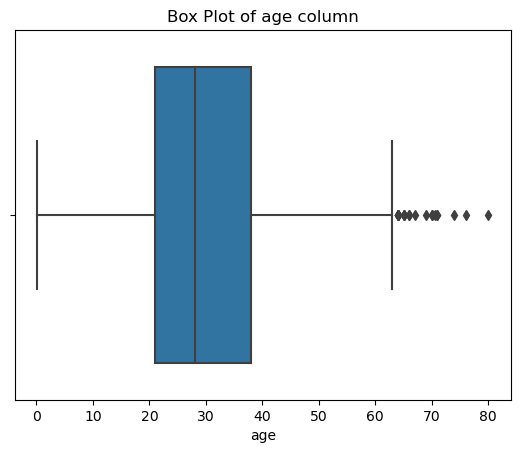

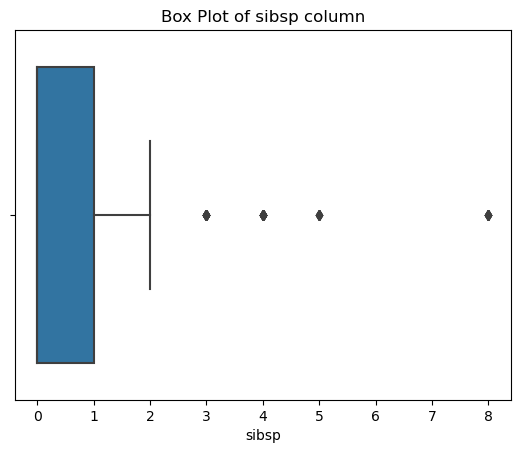

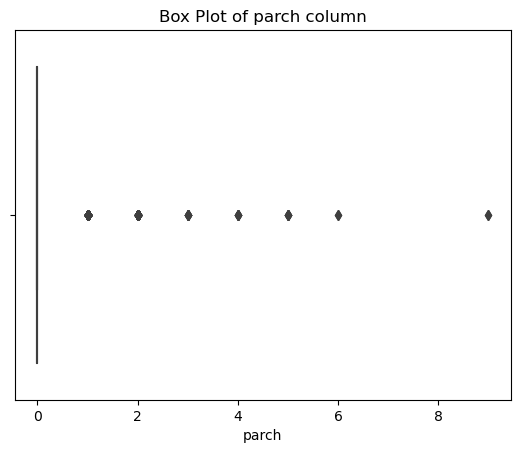

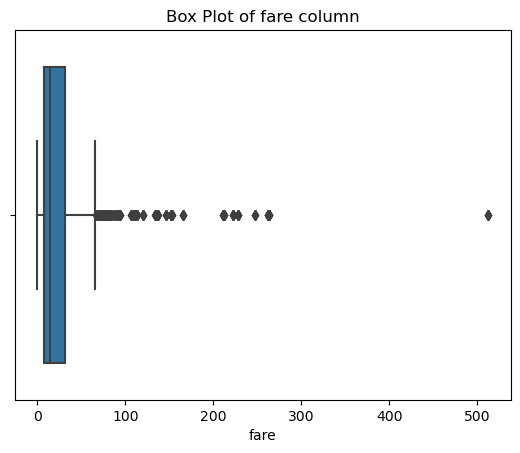

In [75]:
# Box Plot of each Numerical Column
for i in range(len(numericalColumns)):
    col = numericalColumns[i]
    plt.figure(i)
    sns.boxplot(x=finalEncodedDF[col])
    plt.title(f"Box Plot of {col} column")

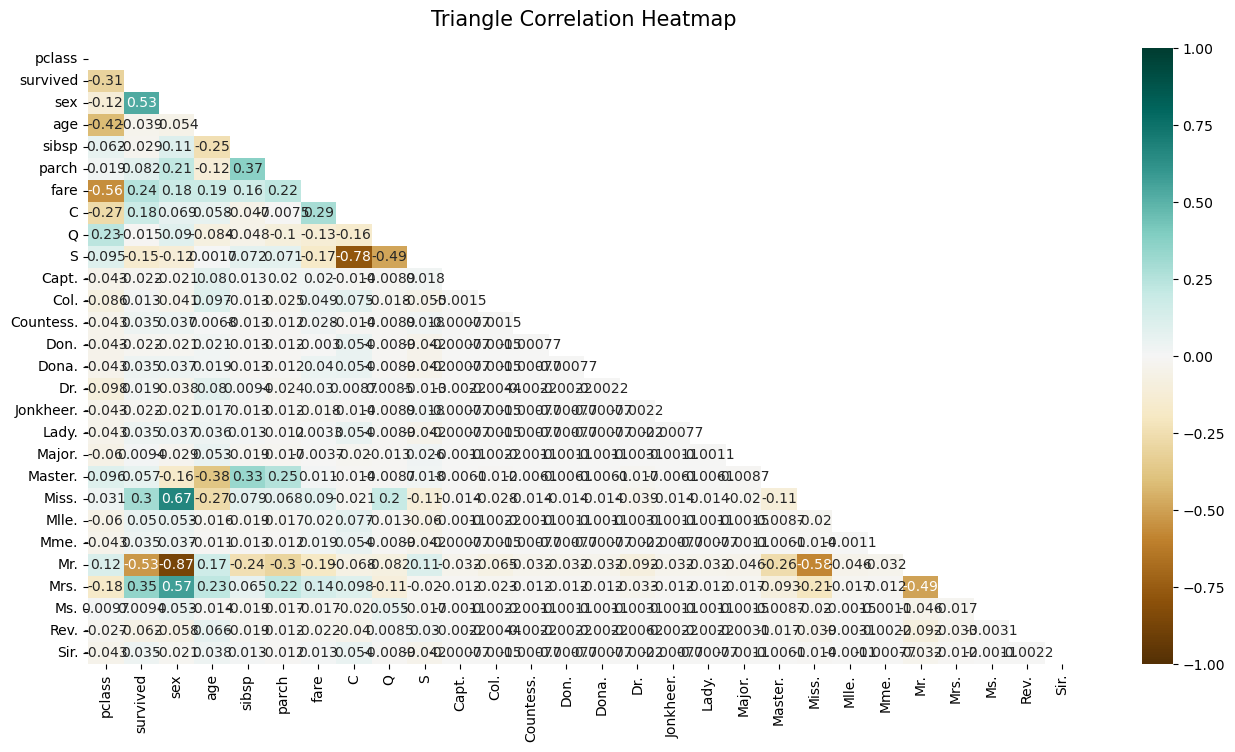

In [79]:
plt.figure(figsize=(16, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(finalEncodedDF.corr(), dtype=bool))
heatmap = sns.heatmap(finalEncodedDF.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':15}, pad=16)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [80]:
# Splitting target variable, survived, from features
yDF = finalEncodedDF["survived"]
xDF = finalEncodedDF.drop(columns=["survived"], axis=1)

print(xDF.columns)
xDF.head()

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'C', 'Q', 'S',
       'Capt.', 'Col.', 'Countess.', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.',
       'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.',
       'Ms.', 'Rev.', 'Sir.'],
      dtype='object')


,pclass,sex,age,sibsp,parch,fare,C,Q,S,Capt.,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,1,0,28.5,0,0,27.7208,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,12.0,0,0,15.7500,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,40.0,0,0,15.7500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,31.0,0,0,28.5375,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,1,18.0,1,0,17.8000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [82]:
pd.DataFrame(yDF)

,survived
0,0
1,1
2,1
3,1
4,0
...,...
1301,0
1302,0
1303,0
1304,0


In [83]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
    xDF, yDF, 
    test_size=0.05,
    shuffle = True,
    stratify = yDF)

In [84]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

In [164]:
# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV

In [188]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

parameters = [{'penalty':['l1','l2'],
              'C':[.2, .5, 1, 1.5]}]
gridSearch = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

logisticParams = gridSearch.best_params_

logisticParams

c:\Users\austi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\austi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\austi\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\austi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

{'C': 0.2, 'penalty': 'l2'}

In [166]:
logisticParams

{'C': 0.2, 'penalty': 'l2'}

In [167]:
# Support Vector
from sklearn.svm import SVC

parameters = {'C':[.01,.1,.5,1],
              'gamma':[500000,250000,100000,50000],
              'kernel':['linear','rbf']} 
gridSearch = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

svmParams = gridSearch.best_params_

svmParams 

{'C': 0.5, 'gamma': 500000, 'kernel': 'linear'}

In [168]:
svmParams

{'C': 0.5, 'gamma': 500000, 'kernel': 'linear'}

In [169]:
# neural network
from sklearn.neural_network import MLPClassifier

parameters = parameter_space = {
    'max_iter': [1000],
    'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

mlpParams = gridSearch.best_params_

mlpParams

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'solver': 'adam'}

In [170]:
mlpParams

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'solver': 'adam'}

In [189]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 50,60,70,80],
              'min_samples_split': [10, 12, 15, 20],
              'min_samples_leaf': [10, 12, 14, 16, 20],
              'max_features': [None, 'sqrt', 'log2']}

              
gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

treeParams = gridSearch.best_params_

treeParams

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'splitter': 'best'}

In [190]:
treeParams

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'splitter': 'best'}

In [200]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 50, 60, 70, 80, 100],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2', 'auto'],
              'n_estimators': [100,200,300],
              'max_leaf_nodes': [None]}

              
gridSearch = GridSearchCV(estimator = RandomForestClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

forestParams = gridSearch.best_params_

forestParams

c:\Users\austi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\austi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\austi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\austi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\austi\anaconda3\Lib\site-pac

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [201]:
forestParams

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [175]:
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [5, 7, 9, 11],
              'weights': ['uniform', 'distance', callable, None],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2, 3, 4],
              'metric': ['minkowski']}

              
gridSearch = GridSearchCV(estimator = KNeighborsClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

kNeighborParams = gridSearch.best_params_

kNeighborParams

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [176]:
kNeighborParams

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [177]:
# Cross Validation to determine best models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [191]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5, shuffle=True)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()        
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = LogisticRegression(**logisticParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.782258064516129    Recall=0.711340206185567    FScore=0.7187499999999999
Completed Fold 1
    Accuracy=0.8185483870967742    Recall=0.7722772277227723    FScore=0.7761194029850748
Completed Fold 2
    Accuracy=0.8266129032258065    Recall=0.7818181818181819    FScore=0.7999999999999999
Completed Fold 3
    Accuracy=0.8225806451612904    Recall=0.7346938775510204    FScore=0.7659574468085106
Completed Fold 4
    Accuracy=0.782258064516129    Recall=0.6666666666666666    FScore=0.689655172413793
Mean accuracy score: 0.806451612903226
Mean f1 score: 0.7500964044414757
Mean precision score: 0.7679298245614035
Mean recall score: 0.7333592319888416


In [179]:
# SVM
from sklearn.svm import SVC

cv = StratifiedKFold(n_splits=5, shuffle=True)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()        
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = SVC(**svmParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)

    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.8185483870967742    Recall=0.7169811320754716    FScore=0.7715736040609137
Completed Fold 1
    Accuracy=0.8104838709677419    Recall=0.7019230769230769    FScore=0.7564766839378237
Completed Fold 2
    Accuracy=0.8145161290322581    Recall=0.7346938775510204    FScore=0.7578947368421053
Completed Fold 3
    Accuracy=0.8185483870967742    Recall=0.7931034482758621    FScore=0.7540983606557378
Completed Fold 4
    Accuracy=0.7782258064516129    Recall=0.7524752475247525    FScore=0.7342995169082124
Mean accuracy score: 0.8080645161290322
Mean f1 score: 0.7548685804809585
Mean precision score: 0.7747458763987208
Mean recall score: 0.7398353564700366


In [192]:
# Neural Network
from sklearn.neural_network import MLPClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()        
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = MLPClassifier(**mlpParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)

    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.8629032258064516    Recall=0.7920792079207921    FScore=0.8247422680412373
Completed Fold 1
    Accuracy=0.8306451612903226    Recall=0.7830188679245284    FScore=0.7980769230769231
Completed Fold 2
    Accuracy=0.8709677419354839    Recall=0.7634408602150538    FScore=0.8160919540229884
Completed Fold 3
    Accuracy=0.842741935483871    Recall=0.7378640776699029    FScore=0.7958115183246073
Completed Fold 4
    Accuracy=0.8588709677419355    Recall=0.7741935483870968    FScore=0.8044692737430169
Mean accuracy score: 0.8532258064516128
Mean f1 score: 0.8078383874417547
Mean precision score: 0.8502658839596015
Mean recall score: 0.7701193124234746


In [193]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()        
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = DecisionTreeClassifier(**treeParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)

    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.6814516129032258    Recall=0.24742268041237114    FScore=0.3779527559055118
Completed Fold 1
    Accuracy=0.7258064516129032    Recall=0.4105263157894737    FScore=0.5342465753424658
Completed Fold 2
    Accuracy=0.7459677419354839    Recall=0.5242718446601942    FScore=0.631578947368421
Completed Fold 3
    Accuracy=0.8669354838709677    Recall=0.8351648351648352    FScore=0.8216216216216216
Completed Fold 4
    Accuracy=0.7137096774193549    Recall=0.5363636363636364    FScore=0.6243386243386243
Mean accuracy score: 0.7467741935483871
Mean f1 score: 0.5979477049153289
Mean precision score: 0.7828339221495224
Mean recall score: 0.5107498624781022


In [202]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()        
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = RandomForestClassifier(**forestParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)

    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.8991935483870968    Recall=0.8478260869565217    FScore=0.861878453038674
Completed Fold 1
    Accuracy=0.9112903225806451    Recall=0.8137254901960784    FScore=0.8829787234042553
Completed Fold 2
    Accuracy=0.8387096774193549    Recall=0.7524752475247525    FScore=0.7916666666666667
Completed Fold 3
    Accuracy=0.8387096774193549    Recall=0.7244897959183674    FScore=0.7802197802197802
Completed Fold 4
    Accuracy=0.8629032258064516    Recall=0.7572815533980582    FScore=0.8210526315789473
Mean accuracy score: 0.8701612903225808
Mean f1 score: 0.8275592509816647
Mean precision score: 0.8836950855985304
Mean recall score: 0.7791596347987557


In [183]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()        
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = KNeighborsClassifier(**kNeighborParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)

    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.8104838709677419    Recall=0.7184466019417476    FScore=0.7589743589743588
Completed Fold 1
    Accuracy=0.8548387096774194    Recall=0.8137254901960784    FScore=0.8217821782178217
Completed Fold 2
    Accuracy=0.8669354838709677    Recall=0.8217821782178217    FScore=0.8341708542713568
Completed Fold 3
    Accuracy=0.8266129032258065    Recall=0.6770833333333334    FScore=0.7514450867052023
Completed Fold 4
    Accuracy=0.8588709677419355    Recall=0.8085106382978723    FScore=0.8128342245989305
Mean accuracy score: 0.8435483870967742
Mean f1 score: 0.7958413405535342
Mean precision score: 0.8285293493656548
Mean recall score: 0.7679096483973706


My Neural Network, Random Forest, and K-Nearest Neighbor had the best results during cross validation

In [222]:
### feature scaling
xScaler = StandardScaler()
xColNames = xLocalTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
# apply the scaling to the testing set
xTestScaled = xScaler.transform(xTest[xColNames])

In [223]:
# Retraining best models and testing them on the test set
################ 
# Neural Net
################
clf = MLPClassifier(**mlpParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

nnAccuracy = accuracy_score(yTest, preds)
nnFScore = f1_score(yTest, preds)
nnPrecision = precision_score(yTest, preds)
nnRecall = recall_score(yTest, preds)


################ 
# K-Nearest Neighbor
################

clf = KNeighborsClassifier(**kNeighborParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

kNeigborAccuracy = accuracy_score(yTest, preds)
kNeighborFScore = f1_score(yTest, preds)
kNeighborPrecision = precision_score(yTest, preds)
kNeighborRecall = recall_score(yTest, preds)

################ 
# Random Forest
################

clf = RandomForestClassifier(**forestParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

randomForestAccuracy = accuracy_score(yTest, preds)
randomForestFScore = f1_score(yTest, preds)
randomForestPrecision = precision_score(yTest, preds)
randomForestRecall = recall_score(yTest, preds)



scoreDict = {"model" : ["Neural Network", "K-Nearest Neighbor", "Random Forest"],
            "accuracy" : [nnAccuracy, kNeigborAccuracy, randomForestAccuracy],
            "fScore" : [nnFScore, kNeighborFScore, randomForestFScore],
            "precision" : [nnPrecision, kNeighborPrecision, randomForestPrecision],
            "recall" : [nnRecall, kNeighborRecall, randomForestRecall]}

resultsDF = pd.DataFrame.from_dict(scoreDict)

resultsDF

,model,accuracy,fScore,precision,recall
0,Neural Network,0.772727,0.666667,0.750000,0.60
1,K-Nearest Neighbor,0.727273,0.608696,0.666667,0.56
2,Random Forest,0.833333,0.744186,0.888889,0.64
